In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def replace_Bad_Year(value):
    if len(value) < 4:
        return '1700'
    else:
        return value
    
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [3]:
#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("./Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
print('Complete - 3 of 7')
titleBasics = titleBasics[(titleBasics.isAdult == "0") & (titleBasics.titleType == 'movie')]
print('cleanup of startYear')
titleBasics['startYear'] = titleBasics.apply(lambda x: replace_Bad_Year(x['startYear']), axis=1)
titleBasics['startYear']= titleBasics.startYear.astype(int)
print(titleBasics.head(5))

Reading title.basics.tsv
Complete - 3 of 7
cleanup of startYear
        tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
145  tt0000147     movie  The Corbett-Fitzsimmons Fight   
332  tt0000335     movie          Soldiers of the Cross   
499  tt0000502     movie                       Bohemios   
571  tt0000574     movie    The Story of the Kelly Gang   

                     originalTitle isAdult  startYear endYear runtimeMinutes  \
8                       Miss Jerry       0       1894      \N             45   
145  The Corbett-Fitzsimmons Fight       0       1897      \N             20   
332          Soldiers of the Cross       0       1900      \N             \N   
499                       Bohemios       0       1905      \N            100   
571    The Story of the Kelly Gang       0       1906      \N             70   

                     genres  
8                   Romance  
145  Documentary,News,Sport  
332       

In [4]:
#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("./Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('Complete - 7 of 7')
titleRatings.numVotes.astype(int)
print('mean: ',titleRatings.numVotes.mean())
print('mode: ',titleRatings.numVotes.mode())
print('max: ',titleRatings.numVotes.max())
cut_points = [150,978,25000,100000,200000,400000,800000,1000000]
labels = ["low","medium","high","very high","100000","200000","400000","800000","HUGE"]
titleRatings["myVoteVolume"] = binning(titleRatings["numVotes"], cut_points, labels)

print(titleRatings.head(5))


Reading title.ratings.tsv
Complete - 7 of 7
mean:  978.3574526334341
mode:  0    5
dtype: int32
max:  1971974
      tconst  averageRating  numVotes myVoteVolume
0  tt0000001            5.8      1389         high
1  tt0000002            6.5       163       medium
2  tt0000003            6.6       978       medium
3  tt0000004            6.4        98          low
4  tt0000005            6.2      1671         high


In [18]:
myData = pd.merge(titleRatings, titleBasics, left_on = 'tconst', right_on = 'tconst', how='inner')
myData.corr().to_csv('myData_corr.csv')

myData_all = myData[(myData.startYear > 1900) & (myData.startYear < 2018)]
pivot_all = myData_all.pivot_table(index=[myData_all.startYear],
                              values=["averageRating"],
                              aggfunc = pd.np.mean,
                              fill_value = 0)



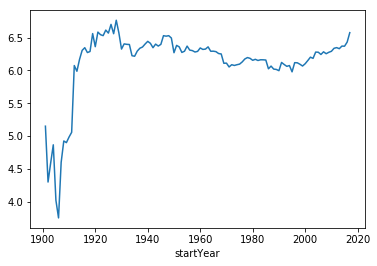

In [19]:
pivot_all['averageRating'].plot(kind='line')

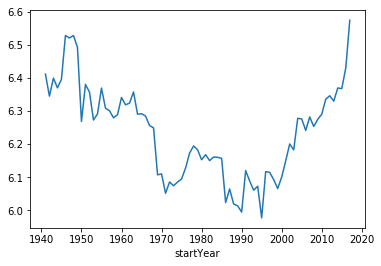

In [20]:
myData = myData[(myData.startYear > 1940) & (myData.startYear < 2018)]
pivot1980 = myData.pivot_table(index=[myData.startYear],
                              values=["averageRating"],
                              aggfunc = pd.np.mean,
                              fill_value = 0)

pivot1980 
pivot1980['averageRating'].plot(kind='line')

In [21]:
pivot1980.averageRating.mean()

6.2359811376209695

In [12]:
myData = myData[(myData.startYear > 1994) & (myData.startYear < 2018)]
pivot1995 = myData.pivot_table(index=[myData.startYear],
                              values=["averageRating"],
                              aggfunc = pd.np.mean,
                              fill_value = 0)
pivot1995

,averageRating
startYear,
1995,5.977445
1996,6.117000
1997,6.115095
1998,6.092981
1999,6.065979
2000,6.100846
2001,6.149499
2002,6.200606
2003,6.182687


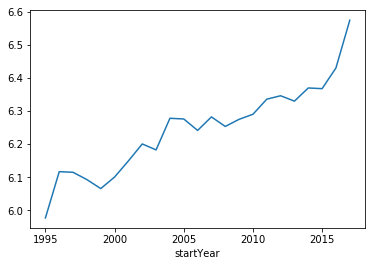

In [22]:
pivot1995['averageRating'].plot(kind='line')

In [23]:
#pivot.averageRating.mean()
pivot1995.averageRating.mean()

6.245692729001322

In [ ]:
#myData1 = myData[(myData.myVoteVolume == 'blockbuster') | (myData.myVoteVolume == 'very high')]
myDataNumVotes['100000'] myData_all[myData.numVotes > 100000]
myData.describe()

#myData2.corr().to_csv('myData_corr.csv')


In [ ]:
myData2.corr()

<h1>Genre</h2>

In [24]:
myGenreData = pd.merge(titleRatings, titleBasics, left_on = 'tconst', right_on = 'tconst', how='inner')
myGenreData = myGenreData[myGenreData.startYear > 1970]
myGenreData.head(10)

,tconst,averageRating,numVotes,myVoteVolume,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1734,tt0015724,6.4,18,low,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
4416,tt0023331,6.8,66,low,movie,Pesn o geroyakh,Pesn o geroyakh,0,1983,\N,50,Documentary
11701,tt0035423,6.4,71429,very high,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance"
12496,tt0036606,6.6,209,medium,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,Drama
14398,tt0039442,7.2,112,low,movie,"Habla, mudita","Habla, mudita",0,1973,\N,88,Drama
23640,tt0053295,6.5,112,low,movie,Sonnensucher,Sonnensucher,0,1972,\N,116,Drama
24627,tt0054724,3.2,1045,high,movie,I Eat Your Skin,Zombie,0,1971,\N,92,Horror
25686,tt0056166,2.4,18,low,movie,Lash of Lust,Lash of Lust,0,1972,\N,\N,Western
26628,tt0057461,4.1,10,low,movie,La rosa de los vientos,La rosa de los vientos,0,1983,\N,84,\N
27657,tt0058994,5.3,110,low,movie,Bruce's Deadly Fingers,Lung men bei chi,0,1976,\N,91,"Action,Crime,Drama"


In [25]:
def strType(var):
    try:
        if int(var) == float(var):
            return 'int'
    except:
        try:
            float(var)
            return 'float'
        except:
            return 'str'

def find_Value(value, subString):
    if strType(value) == 'str':
        if subString in value:
            return True
        else:
            return False
    else:
        return False


In [26]:
print('calculating genre categories')
print('finding Action')
myGenreData['Action'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Action'), axis=1)
print('finding Adventure')
myGenreData['Adventure'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Adventure'), axis=1)
print('finding Animation')
myGenreData['Animation'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Animation'), axis=1)
print('finding Biography')
myGenreData['Biography'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Biography'), axis=1)
print('finding Comedy')
myGenreData['Comedy'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Comedy'), axis=1)
print('finding Drama')
myGenreData['Drama'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Drama'), axis=1)
print('finding Crime')
myGenreData['Crime'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Crime'), axis=1)
print('finding Family')
myGenreData['Family'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Family'), axis=1)
print('finding History')
myGenreData['History'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'History'), axis=1)
print('finding Horror')
myGenreData['Horror'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Horror'), axis=1)
print('finding Music')
myGenreData['Music'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Music'), axis=1)
print('finding Mystery')
myGenreData['Mystery'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Mystery'), axis=1)
print('finding Romance')
myGenreData['Romance'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Romance'), axis=1)
print('finding Sci-Fi')
myGenreData['Sci-Fi'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Sci-Fi'), axis=1)
print('finding Thriller')
myGenreData['Thriller'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Thriller'), axis=1)
print('finding War')
myGenreData['War'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'War'), axis=1)
print('finding Western')
myGenreData['Western'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Western'), axis=1)


calculating genre categories
finding Action
finding Adventure
finding Animation
finding Biography
finding Comedy
finding Drama
finding Crime
finding Family
finding History
finding Horror
finding Music
finding Mystery
finding Romance
finding Sci-Fi
finding Thriller
finding War
finding Western


In [27]:
print(myGenreData.head(10))

          tconst  averageRating  numVotes myVoteVolume titleType  \
1734   tt0015724            6.4        18          low     movie   
4416   tt0023331            6.8        66          low     movie   
11701  tt0035423            6.4     71429    very high     movie   
12496  tt0036606            6.6       209       medium     movie   
14398  tt0039442            7.2       112          low     movie   
23640  tt0053295            6.5       112          low     movie   
24627  tt0054724            3.2      1045         high     movie   
25686  tt0056166            2.4        18          low     movie   
26628  tt0057461            4.1        10          low     movie   
27657  tt0058994            5.3       110          low     movie   

                      primaryTitle                originalTitle isAdult  \
1734                 Dama de noche                Dama de noche       0   
4416               Pesn o geroyakh              Pesn o geroyakh       0   
11701               Kate &

In [99]:
myGenreAvg = pd.DataFrame(columns = ["genre","averageRating", "max", "min","count","stdDev","numVotes"])

#Action
myGenreData_temp = myGenreData[myGenreData['Action'] == True]
myGenreAvg.loc[0] = ["Action",myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Animation
myGenreData_temp = myGenreData[myGenreData['Animation'] == True]
myGenreAvg.loc[1] = ["Animation",myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Biography
myGenreData_temp = myGenreData[myGenreData['Biography'] == True]
myGenreAvg.loc[2] = ["Biography",myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Comedy
myGenreData_temp = myGenreData[myGenreData['Comedy'] == True]
myGenreAvg.loc[3] = ['Comedy', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Drama
myGenreData_temp = myGenreData[myGenreData['Drama'] == True]
myGenreAvg.loc[4] = ['Drama', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Crime
myGenreData_temp = myGenreData[myGenreData['Crime'] == True]
myGenreAvg.loc[5] = ['Crime', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Family
myGenreData_temp = myGenreData[myGenreData['Family'] == True]
myGenreAvg.loc[6] = ['Family', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#History
myGenreData_temp = myGenreData[myGenreData['History'] == True]
myGenreAvg.loc[7] = ['History', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Horror
myGenreData_temp = myGenreData[myGenreData['Horror'] == True]
myGenreAvg.loc[8] = ['Horror', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Music
myGenreData_temp = myGenreData[myGenreData['Music'] == True]
myGenreAvg.loc[9] = ['Music', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Mystery
myGenreData_temp = myGenreData[myGenreData['Mystery'] == True]
myGenreAvg.loc[10] = ['Mystery', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Romance
myGenreData_temp = myGenreData[myGenreData['Romance'] == True]
myGenreAvg.loc[11] = ['Romance', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Sci-Fi
myGenreData_temp = myGenreData[myGenreData['Sci-Fi'] == True]
myGenreAvg.loc[12] = ['Sci-Fi', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Thriller
myGenreData_temp = myGenreData[myGenreData['Thriller'] == True]
myGenreAvg.loc[13] = ['Thriller', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#War
myGenreData_temp = myGenreData[myGenreData['War'] == True]
myGenreAvg.loc[14] = ['War', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Western
myGenreData_temp = myGenreData[myGenreData['Western'] == True]
myGenreAvg.loc[15] = ['Western', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

myGenreAvg = myGenreAvg.sort_values(by=['averageRating'], ascending=False)
myGenreAvg


,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.123051,10.0,1.0,5540,1.065769,7146.617329
7,History,7.015508,10.0,1.1,4443,1.119662,4653.562008
9,Music,6.740778,10.0,1.0,6121,1.393179,2842.334259
14,War,6.572545,10.0,1.2,2688,1.264757,4702.245164
1,Animation,6.405162,9.4,1.1,3293,1.198474,11310.192833
4,Drama,6.356365,10.0,1.0,72275,1.219938,4396.232238
6,Family,6.295359,10.0,1.0,6938,1.334027,4659.226578
11,Romance,6.146428,9.8,1.0,16880,1.204460,4999.062441
5,Crime,6.055627,10.0,1.1,13080,1.251098,9766.660474
10,Mystery,5.972357,9.7,1.0,5864,1.294172,10425.181276


In [100]:
myGenreAvg = myGenreAvg.sort_values(by=['averageRating'], ascending=False)
myGenreAvg

,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.123051,10.0,1.0,5540,1.065769,7146.617329
7,History,7.015508,10.0,1.1,4443,1.119662,4653.562008
9,Music,6.740778,10.0,1.0,6121,1.393179,2842.334259
14,War,6.572545,10.0,1.2,2688,1.264757,4702.245164
1,Animation,6.405162,9.4,1.1,3293,1.198474,11310.192833
4,Drama,6.356365,10.0,1.0,72275,1.219938,4396.232238
6,Family,6.295359,10.0,1.0,6938,1.334027,4659.226578
11,Romance,6.146428,9.8,1.0,16880,1.204460,4999.062441
5,Crime,6.055627,10.0,1.1,13080,1.251098,9766.660474
10,Mystery,5.972357,9.7,1.0,5864,1.294172,10425.181276


In [92]:
#drop low averageRating (last 3)
myTargetGenre = myGenreAvg
eliminated = myTargetGenre.iloc[[-2, -1]]
myTargetGenre = myTargetGenre[:-2]
eliminated

,genre,averageRating,max,min,count,stdDev,numVotes
12,Sci-Fi,5.372167,10.0,1.0,4642,1.473615,19058.083800
8,Horror,5.097446,9.3,1.0,13391,1.401374,4353.073856


In [93]:
myTargetGenre

,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.123051,10.0,1.0,5540,1.065769,7146.617329
7,History,7.015508,10.0,1.1,4443,1.119662,4653.562008
9,Music,6.740778,10.0,1.0,6121,1.393179,2842.334259
14,War,6.572545,10.0,1.2,2688,1.264757,4702.245164
1,Animation,6.405162,9.4,1.1,3293,1.198474,11310.192833
4,Drama,6.356365,10.0,1.0,72275,1.219938,4396.232238
6,Family,6.295359,10.0,1.0,6938,1.334027,4659.226578
11,Romance,6.146428,9.8,1.0,16880,1.204460,4999.062441
5,Crime,6.055627,10.0,1.1,13080,1.251098,9766.660474
10,Mystery,5.972357,9.7,1.0,5864,1.294172,10425.181276


In [94]:
#myTargetGenre = myGenreAvg[(myGenreAvg.averageRating >= myGenreAvg.averageRating.mode()) & (myGenreAvg.stdDev < myGenreAvg.stdDev.mode()) & (myGenreAvg.numVotes > myGenreAvg.numVotes.mode())]
myTargetGenre = myTargetGenre.sort_values(by=['stdDev'], ascending=True)
eliminated = myTargetGenre.iloc[[-2, -1]]
myTargetGenre = myTargetGenre[:-2]
eliminated


,genre,averageRating,max,min,count,stdDev,numVotes
0,Action,5.734096,9.8,1.0,18803,1.391897,10634.368186
9,Music,6.740778,10.0,1.0,6121,1.393179,2842.334259


In [95]:
myTargetGenre

,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.123051,10.0,1.0,5540,1.065769,7146.617329
7,History,7.015508,10.0,1.1,4443,1.119662,4653.562008
1,Animation,6.405162,9.4,1.1,3293,1.198474,11310.192833
11,Romance,6.146428,9.8,1.0,16880,1.204460,4999.062441
4,Drama,6.356365,10.0,1.0,72275,1.219938,4396.232238
5,Crime,6.055627,10.0,1.1,13080,1.251098,9766.660474
14,War,6.572545,10.0,1.2,2688,1.264757,4702.245164
10,Mystery,5.972357,9.7,1.0,5864,1.294172,10425.181276
6,Family,6.295359,10.0,1.0,6938,1.334027,4659.226578
3,Comedy,5.955469,10.0,1.0,41755,1.341603,4677.917543


In [96]:
myTargetGenre = myTargetGenre.sort_values(by=['numVotes'], ascending=False)
eliminated = myTargetGenre.iloc[[-2, -1]]
myTargetGenre = myTargetGenre[:-2]
eliminated


,genre,averageRating,max,min,count,stdDev,numVotes
15,Western,5.749574,9.3,1.4,938,1.384232,4436.336887
4,Drama,6.356365,10.0,1.0,72275,1.219938,4396.232238


In [97]:
myTargetGenre

,genre,averageRating,max,min,count,stdDev,numVotes
1,Animation,6.405162,9.4,1.1,3293,1.198474,11310.192833
10,Mystery,5.972357,9.7,1.0,5864,1.294172,10425.181276
5,Crime,6.055627,10.0,1.1,13080,1.251098,9766.660474
13,Thriller,5.660594,9.8,1.0,15711,1.357481,7386.213417
2,Biography,7.123051,10.0,1.0,5540,1.065769,7146.617329
11,Romance,6.146428,9.8,1.0,16880,1.204460,4999.062441
14,War,6.572545,10.0,1.2,2688,1.264757,4702.245164
3,Comedy,5.955469,10.0,1.0,41755,1.341603,4677.917543
6,Family,6.295359,10.0,1.0,6938,1.334027,4659.226578
7,History,7.015508,10.0,1.1,4443,1.119662,4653.562008


In [ ]:
#History + Biography
myGenreData_temp = myGenreData[(myGenreData['History'] == True) & (myGenreData['Biography'] == True)]
myGenreAvg.loc[16] = ['Historical Biography', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#History + Biography + Animation
myGenreData_temp = myGenreData[(myGenreData['History'] == True) & (myGenreData['Biography'] == True)]
myGenreAvg.loc[16] = ['Historical Biography', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index